## Tarek El-Hajjaoui, 11/15/2022, Stats 200AP

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal, probplot
from mpl_toolkits.mplot3d import Axes3D

In [48]:
# Y1 ∼ N(80, 10^2)
y1_mu = 80
y1_sigma = 10
y1 = np.random.normal(y1_mu, y1_sigma, 1000)

In [49]:
np.mean(y1), np.sqrt(np.var(y1))

(80.05291637914031, 10.006395350742721)

In [50]:
# Y2 ∼ N(83, 10^2)
y2_mu = 83
y2_sigma = 10
y2 = np.random.normal(y2_mu, y2_sigma, 1000)

In [51]:
np.mean(y2), np.sqrt(np.var(y2))

(82.8854172147184, 10.263753316698011)

In [52]:
def univariate_normal_pdf(y, mu, sigma):
    """pdf of the univariate normal distribution."""
    return ((1. / np.sqrt(2 * np.pi * sigma)) * 
            np.exp(-(y - mu)**2 / (2 * sigma)))

In [53]:
def plot_distributions(y1_mu, y1_sigma,
                       y2_mu, y2_sigma,
                       suptitle, title, y1_ax,
                       y2_ax, y1_label, y2_label,
                       lower_limit, upper_limit, pop_size):
    
    x = np.linspace(lower_limit, upper_limit, num=pop_size)
    plt.plot(x, univariate_normal_pdf(x, y1_mu, y1_sigma), linewidth=2, color='r', label=y1_label)
    plt.plot(x, univariate_normal_pdf(x, y2_mu, y2_sigma), linewidth=2, color='g', label=y2_label)         
    plt.suptitle(suptitle)
    plt.title(title)
    plt.xlabel(y1_ax)
    plt.ylabel(y2_ax)
    plt.legend(loc='upper left')
    plt.show()

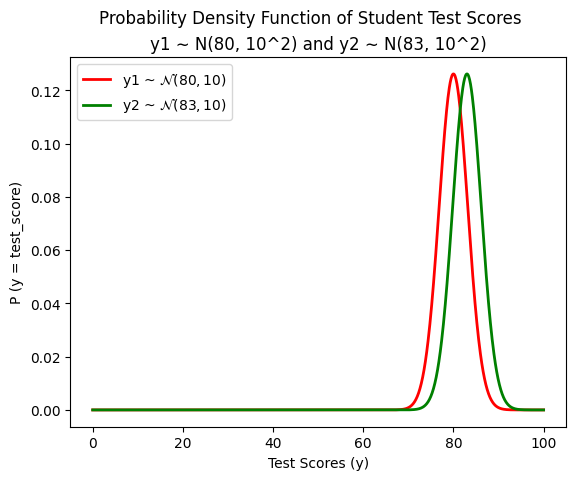

In [54]:
plot_distributions(y1_mu=y1_mu, y1_sigma=y1_sigma, y2_mu=y2_mu, y2_sigma=y2_sigma,
                   suptitle="Probability Density Function of Student Test Scores",
                   title="y1 ∼ N(80, 10^2) and y2 ∼ N(83, 10^2)", y1_ax="Test Scores (y)",
                   y2_ax="P (y = test_score)", y1_label="y1 ~ $\mathcal{N}(80, 10)$",
                   y2_label="y2 ~ $\mathcal{N}(83, 10)$", lower_limit=0, upper_limit=100, pop_size=1000)

In [55]:
def qqplot(y, suptitle):
    fig = plt.figure()
    plt.suptitle(suptitle)
    ax = fig.add_subplot(111)
    res = probplot(y, dist='norm', plot=ax)

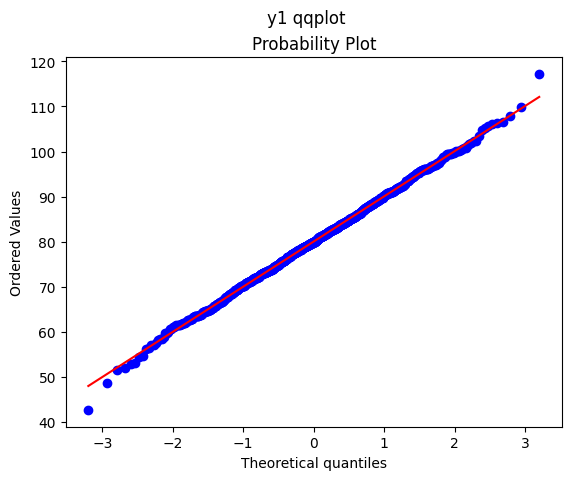

In [56]:
qqplot(y1, suptitle="y1 qqplot")

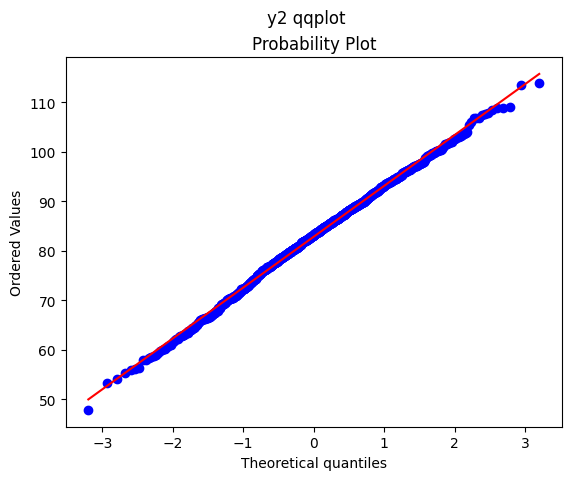

In [57]:
qqplot(y2, suptitle="y2 qqplot")

### E[ (0.4)y1 +(0.4)y2 + (0.2)max{ y1,y2 } ]

In [58]:
def expected_value(y1, y2, y1_weight, y2_weight, y_max_weight):
        return (y1_weight * np.mean(y1)) + (y2_weight * np.mean(y2)) + (y_max_weight * np.mean(np.max([y1, y2]))) 

In [59]:
y_hat = np.array([expected_value(y1[i], y2[i], 0.4, 0.4, 0.2) for i in range(1000)])

In [60]:
y_hat_mu, y_hat_sigma = round(np.mean(y_hat),2), round(np.sqrt(np.var(y_hat)), 2)
y_hat_mu, y_hat_sigma

(82.66, 7.1)

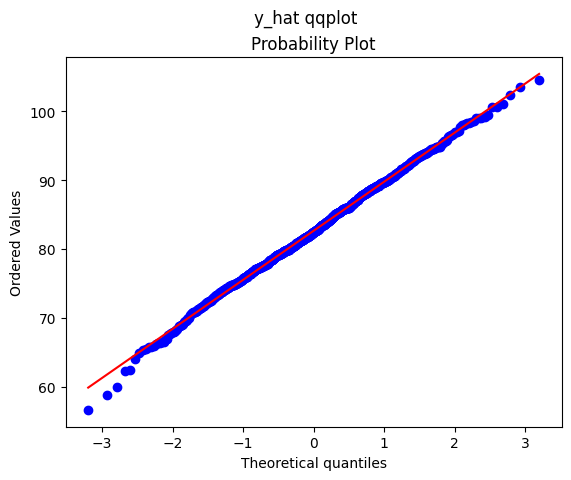

In [61]:
qqplot(y_hat, suptitle="y_hat qqplot")

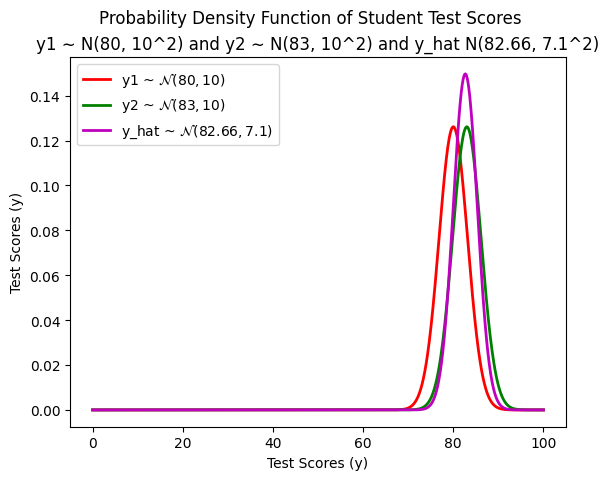

In [62]:
    x = np.linspace(0, 100, num=1000)
    plt.plot(x, univariate_normal_pdf(x, y1_mu, y1_sigma), linewidth=2, color='r', label="y1 ~ $\mathcal{N}(80, 10)$")
    plt.plot(x, univariate_normal_pdf(x, y2_mu, y2_sigma), linewidth=2, color='g', label="y2 ~ $\mathcal{N}(83, 10)$")        
    plt.plot(x, univariate_normal_pdf(x, y_hat_mu, y_hat_sigma), linewidth=2, color='m', label=f"y_hat ~ $\mathcal{{N}}({y_hat_mu}, {y_hat_sigma})$")        
    plt.suptitle("Probability Density Function of Student Test Scores")
    plt.title(f"y1 ∼ N(80, 10^2) and y2 ∼ N(83, 10^2) and y_hat N({y_hat_mu}, {y_hat_sigma}^2)")
    plt.xlabel("Test Scores (y)")
    plt.ylabel("Test Scores (y)")
    plt.legend(loc='upper left')
    plt.show()

### Sources
- matplotlib normal - https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
- matplotlib hist - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
- expected value in Python - https://www.statology.org/expected-value-in-python/
- univariate normal pdf - https://peterroelants.github.io/posts/multivariate-normal-primer/
#### Furture reference for 3d plots 
- https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html
- https://stackoverflow.com/questions/67095247/gca-and-latest-version-of-matplotlib
- https://stackoverflow.com/questions/38698277/plot-normal-distribution-in-3d